In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
file = 'bank2.csv'

bank = pd.read_csv(file, delimiter=',', decimal='.', index_col = 0)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


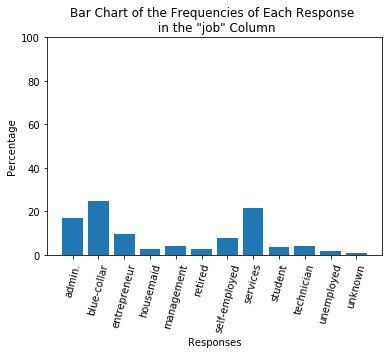

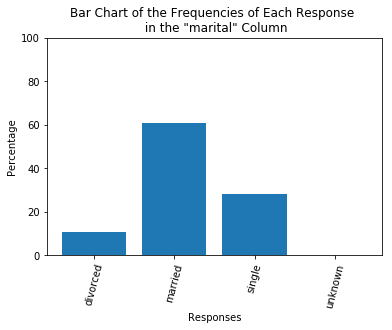

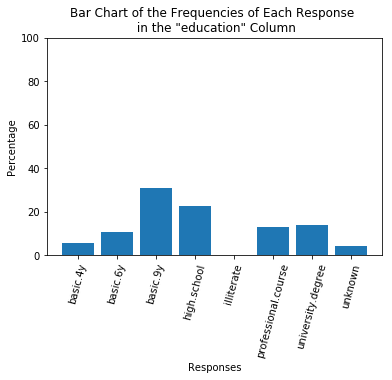

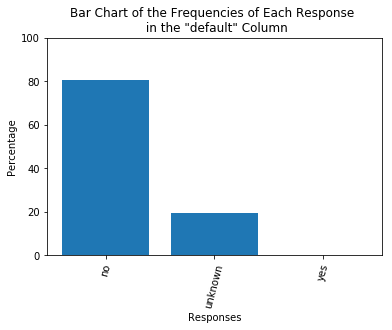

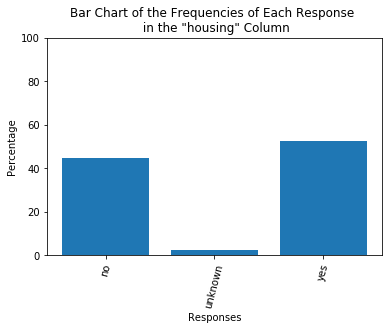

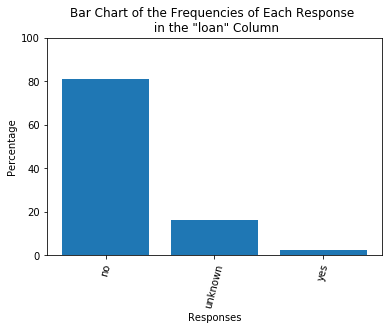

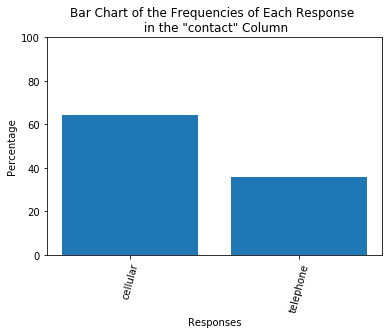

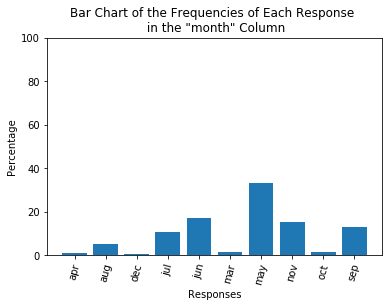

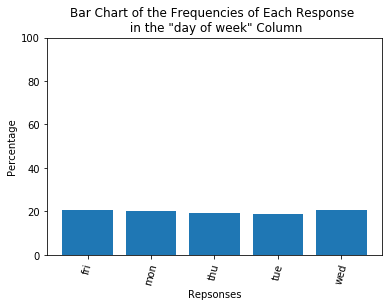

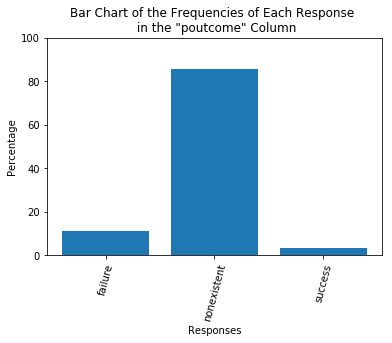

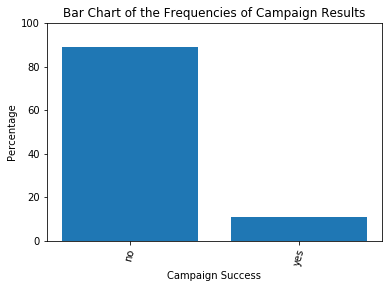

In [8]:
#frequencies for each response in the categorical features
for cols in bank.columns:
    if bank[cols].dtype == object:
        unique = bank[cols].unique()
        prop = (bank[cols].value_counts()/bank.shape[0])*100
        
        plt.bar(unique,prop)
        plt.title("Bar Chart of the Frequencies of Each Response \n in the \"{}\" Column".format(cols))
        
        plt.xlabel("Responses".format(cols))
        plt.xticks(rotation=75)
        
        plt.ylim(0,100)
        plt.ylabel("Percentage")
        
        if cols == 'day_of_week':
            plt.xlabel("Repsonses")
            plt.title("Bar Chart of the Frequencies of Each Response \n in the \"day of week\" Column")
        if cols == 'y':
            plt.xlabel("Campaign Success")
            plt.title("Bar Chart of the Frequencies of Campaign Results")
        plt.show()

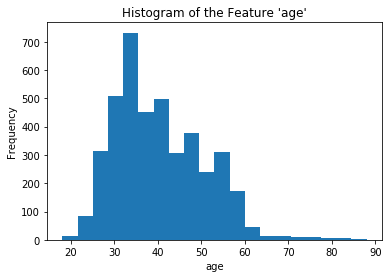

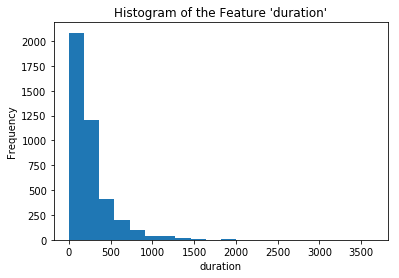

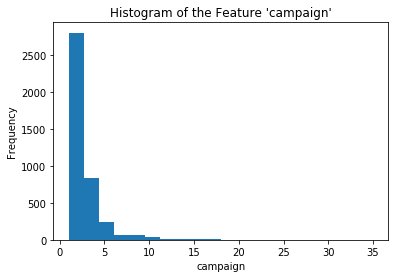

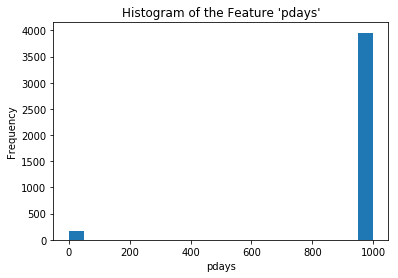

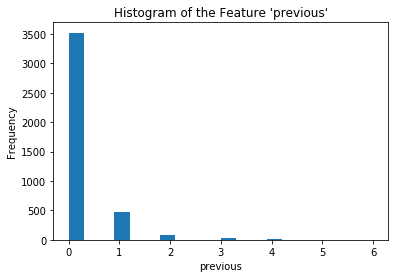

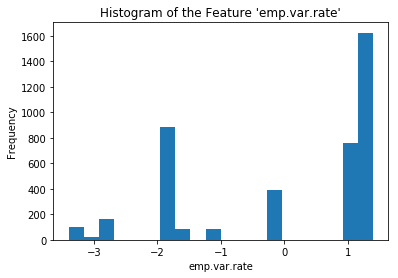

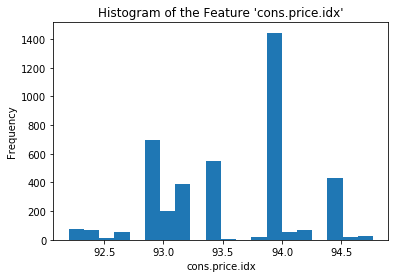

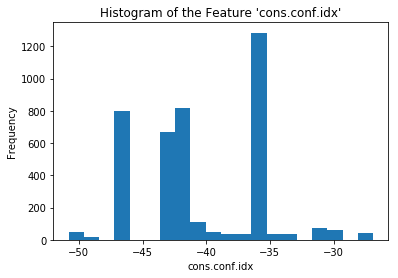

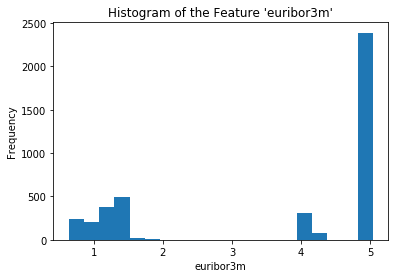

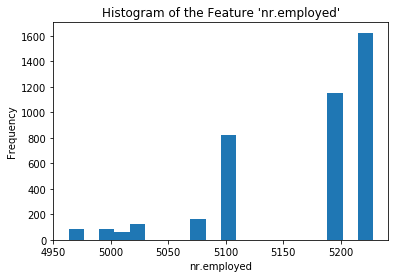

In [11]:
#create a boxplot for all numerical features except for pdays
for cols in bank.columns:
    if bank[cols].dtype != object:
        bplot = bank[cols].plot(kind = 'hist', bins =20)
        plt.xlabel(cols)
        plt.title("Histogram of the Feature \'{}\'".format(cols))
        plt.show()

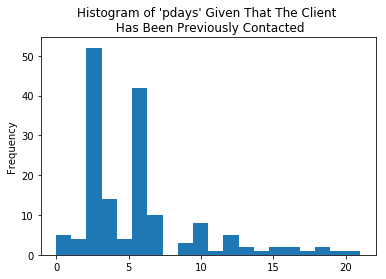

In [13]:
#create a boxplot for pdays, given that there has been a call before
mask_pd = bank['pdays'] <999
new_bank = bank.loc[mask_pd]
new_bank['pdays'].plot(kind = 'hist', bins = 20)
plt.title("Histogram of 'pdays' Given That The Client \n Has Been Previously Contacted")
plt.show()

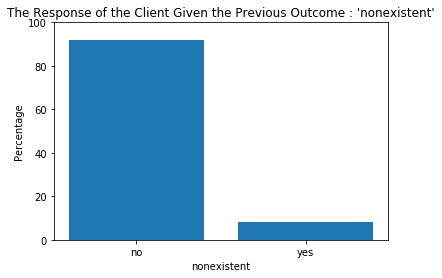

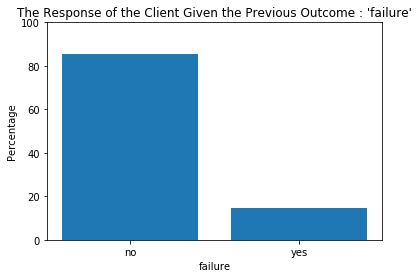

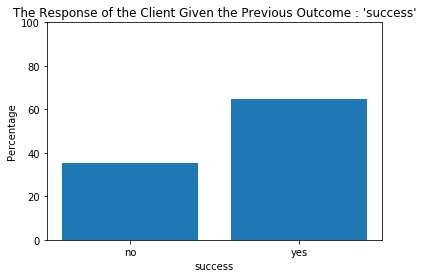

In [14]:
#analysis between variables 1  
plist = list(bank['poutcome'].unique())
for i in plist:
    mask_pout = bank['poutcome'] == i
    new_bank = bank.loc[mask_pout]
    unique = new_bank['y'].unique()
    percent = (new_bank['y'].value_counts()/new_bank.shape[0])*100
    
    plt.bar(unique, percent)
    plt.ylim(0,100)
    plt.xlabel(i)
    plt.ylabel("Percentage")
    plt.title("The Response of the Client Given the Previous Outcome : \'{}\'".format(i))
    plt.show()

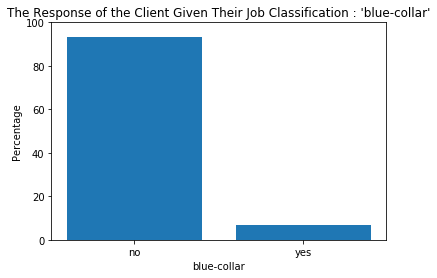

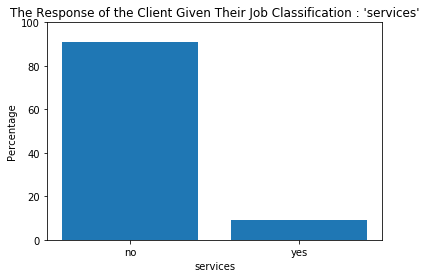

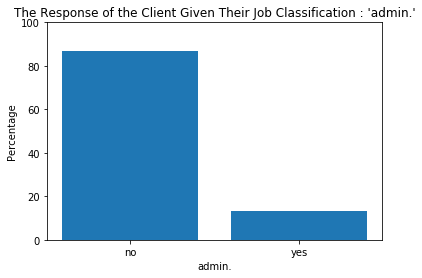

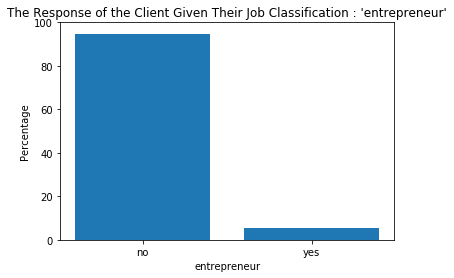

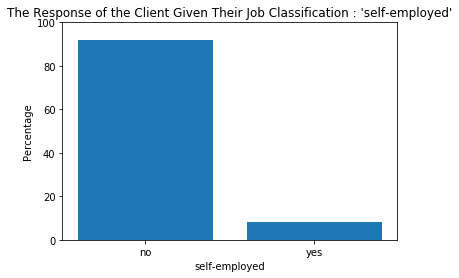

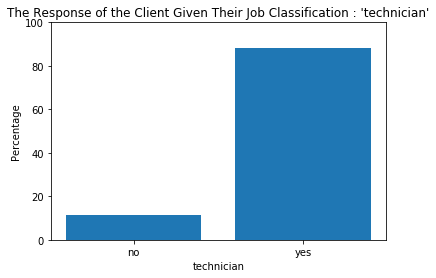

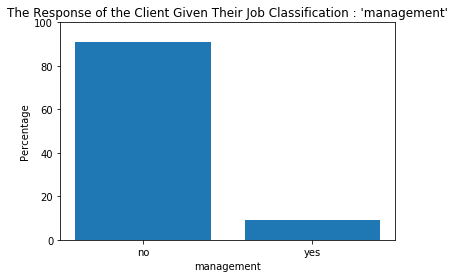

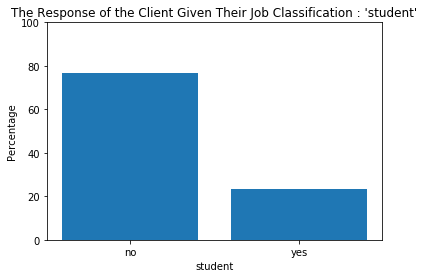

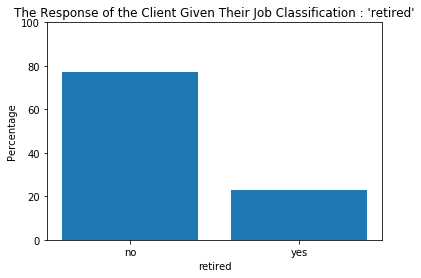

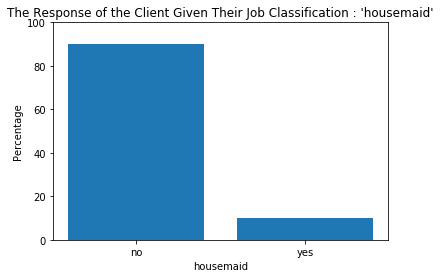

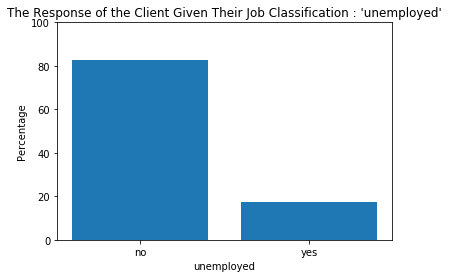

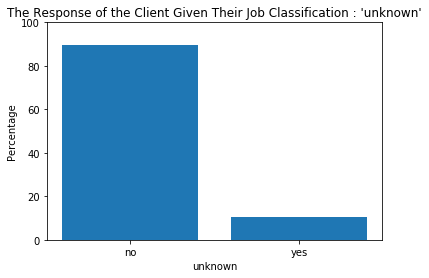

In [15]:
#analysis between variables 2
jlist = list(bank['job'].unique())
for i in jlist:
    mask_pout = bank['job'] == i
    new_bank = bank.loc[mask_pout]
    unique = new_bank['y'].unique()
    percent = (new_bank['y'].value_counts()/new_bank.shape[0])*100
    
    plt.bar(unique, percent)
    plt.ylim(0,100)
    plt.xlabel(i)
    plt.ylabel("Percentage")
    plt.title("The Response of the Client Given Their Job Classification : \'{}\'".format(i))
    plt.show()

C:\Users\jack\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


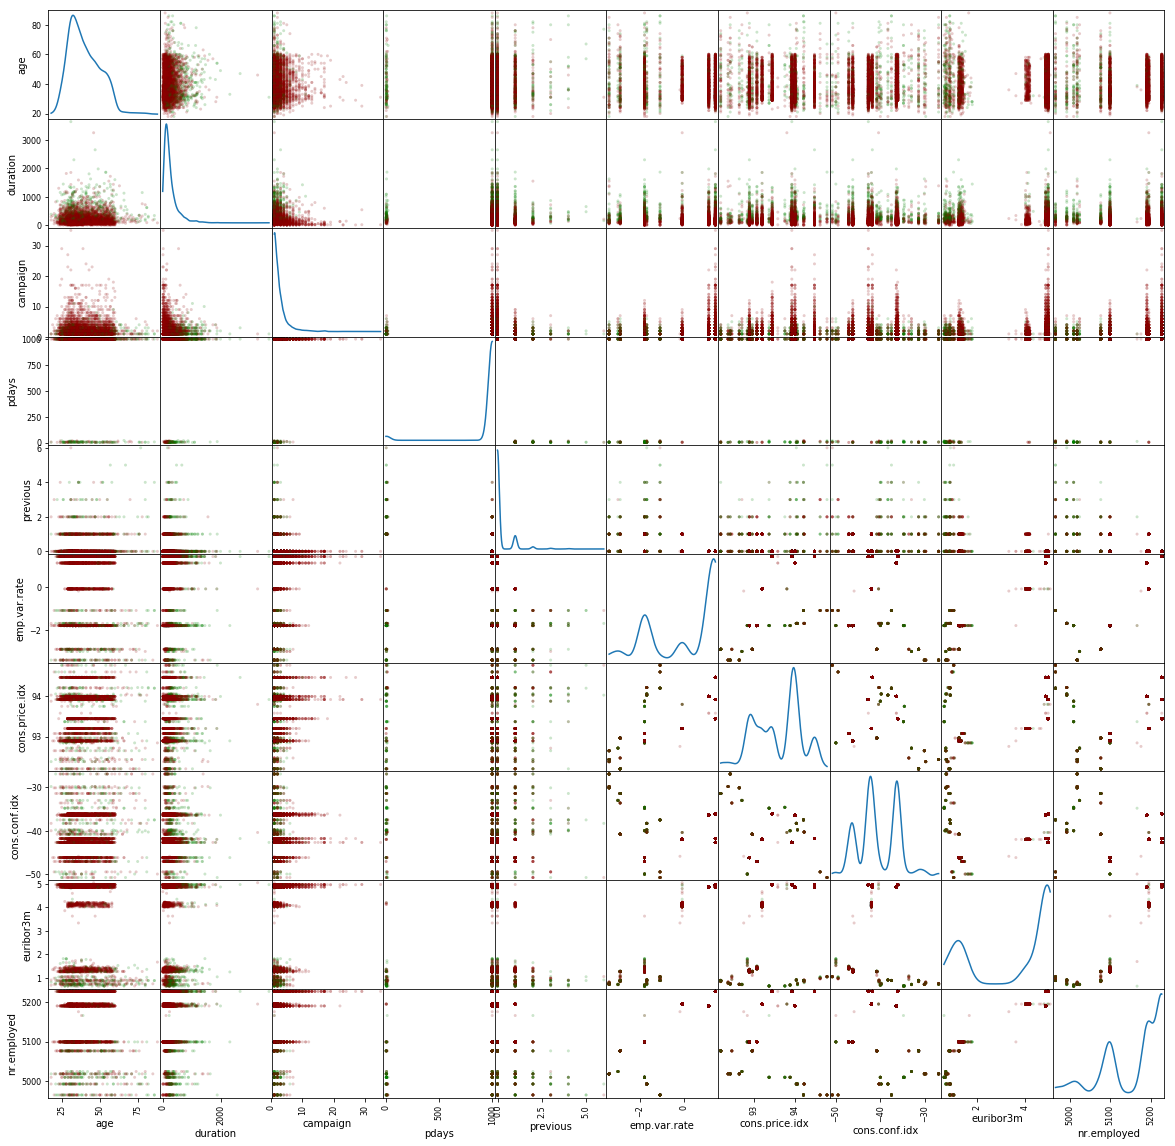

In [16]:
from pandas.tools.plotting import scatter_matrix

palette = {'no':'darkred', 'yes':'green'}
colours = [palette[c] for c in bank['y']]

scatter_matrix(bank, alpha=0.2, color=colours, figsize=(20, 20), diagonal='kde')
plt.show()